In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import os
from tqdm import tqdm

import matplotlib.pyplot as plt
import random

from IPython.display import clear_output

device = 'cuda' if torch.cuda.is_available() else 'cpu'
# device = 'cpu'
device

'cuda'

In [25]:

observations = []
actions  = []
rewards = []

# ['smm', 'icm', 'icm_apt', 'disagreement', 'proto', 'diayn', 'aps', 'rnd']
for ualgo in ['rnd']:
    npz_files = os.listdir(f'datasets/cheetah/{ualgo}/buffer/')
    for file_name in tqdm(npz_files[::100], desc=ualgo):
        data = np.load(f'datasets/cheetah/{ualgo}/buffer/{file_name}')
        observations.append(data['observation'])
        actions.append(data['action'])
        rewards.append(data['reward'])
    
observations = np.concatenate(observations)
actions = np.concatenate(actions)
rewards = np.concatenate(rewards)

rnd: 100%|██████████| 100/100 [00:00<00:00, 1368.67it/s]


0.70448065

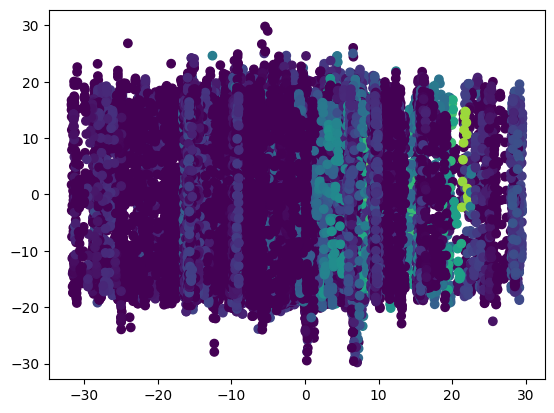

In [38]:
plt.scatter(observations[:, 1], observations[   :, 16], c=rewards, vmin=rewards.min(), vmax=rewards.max())